In [1]:
import datetime
import json
import re
import sys
import time

from bs4 import BeautifulSoup
import requests

In [182]:
url = "https://www.billboard.com/charts/hot-100"
r = requests.get(url)

In [183]:
r

<Response [200]>

In [5]:
r.text

'<!doctype html>\n<html class="" lang="">\n<head>\n\n<script>\n        _udn = "billboard.com";\n    </script>\n<script>function utmx_section(){}function utmx(){}(function(){var\n                k=\'67942495-39\',d=document,l=d.location,c=d.cookie;\n            if(l.search.indexOf(\'utm_expid=\'+k)>0)return;\n            function f(n){if(c){var i=c.indexOf(n+\'=\');if(i>-1){var j=c.\n                    indexOf(\';\',i);return escape(c.substring(i+n.length+1,j<0?c.\n                    length:j))}}}var x=f(\'__utmx\'),xx=f(\'__utmxx\'),h=l.hash;d.write(\n                    \'<sc\'+\'ript src="\'+\'http\'+(l.protocol==\'https:\'?\'s://ssl\':\n                            \'://www\')+\'.google-analytics.com/ga_exp.js?\'+\'utmxkey=\'+k+\n                            \'&utmx=\'+(x?x:\'\')+\'&utmxx=\'+(xx?xx:\'\')+\'&utmxtime=\'+new Date().\n                            valueOf()+(h?\'&utmxhash=\'+escape(h.substr(1)):\'\')+\n                            \'" type="text/javascript" charset="utf-8

In [168]:
soup = BeautifulSoup(r.text, "html.parser")
soup

<!DOCTYPE doctype html>

<html class="" lang="">
<head>
<script>
        _udn = "billboard.com";
    </script>
<script>function utmx_section(){}function utmx(){}(function(){var
                k='67942495-39',d=document,l=d.location,c=d.cookie;
            if(l.search.indexOf('utm_expid='+k)>0)return;
            function f(n){if(c){var i=c.indexOf(n+'=');if(i>-1){var j=c.
                    indexOf(';',i);return escape(c.substring(i+n.length+1,j<0?c.
                    length:j))}}}var x=f('__utmx'),xx=f('__utmxx'),h=l.hash;d.write(
                    '<sc'+'ript src="'+'http'+(l.protocol=='https:'?'s://ssl':
                            '://www')+'.google-analytics.com/ga_exp.js?'+'utmxkey='+k+
                            '&utmx='+(x?x:'')+'&utmxx='+(xx?xx:'')+'&utmxtime='+new Date().
                            valueOf()+(h?'&utmxhash='+escape(h.substr(1)):'')+
                            '" type="text/javascript" charset="utf-8"><\/sc'+'ript>')})();
    </script><script>utmx('url

In [19]:
def fetchEntries(date, name, timeout):
    if not date:
        # Fetch latest chart
        url = "http://www.billboard.com/charts/%s" % (name)
    else:
        url = "http://www.billboard.com/charts/%s/%s" % (name, date)
    req = requests.get(url, timeout= timeout)
    if req.status_code == 404:
        message = "Chart not found (perhaps the name is misspelled?)"
        raise BillboardNotFoundException(message)
    req.raise_for_status()

    soup = BeautifulSoup(req.text, "html.parser")
    return soup

In [173]:
soup = fetchEntries(date="2019-10-05",name='hot-100',timeout=250)
soup

<!DOCTYPE doctype html>

<html class="" lang="">
<head>
<script>
        _udn = "billboard.com";
    </script>
<script>function utmx_section(){}function utmx(){}(function(){var
                k='67942495-39',d=document,l=d.location,c=d.cookie;
            if(l.search.indexOf('utm_expid='+k)>0)return;
            function f(n){if(c){var i=c.indexOf(n+'=');if(i>-1){var j=c.
                    indexOf(';',i);return escape(c.substring(i+n.length+1,j<0?c.
                    length:j))}}}var x=f('__utmx'),xx=f('__utmxx'),h=l.hash;d.write(
                    '<sc'+'ript src="'+'http'+(l.protocol=='https:'?'s://ssl':
                            '://www')+'.google-analytics.com/ga_exp.js?'+'utmxkey='+k+
                            '&utmx='+(x?x:'')+'&utmxx='+(xx?xx:'')+'&utmxtime='+new Date().
                            valueOf()+(h?'&utmxhash='+escape(h.substr(1)):'')+
                            '" type="text/javascript" charset="utf-8"><\/sc'+'ript>')})();
    </script><script>utmx('url

In [24]:
soup.select_one('meta[name="twitter:title"]')

<meta content="The Hot 100 | Billboard" name="twitter:title" property="twitter:title"/>

In [27]:
soup.select_one("button.date-selector__button.button--link")

<button aria-haspopup="dialog" class="date-selector__button button--link">
                October 12, 2019
                <span class="date-selector__button__icon fa fa-angle-down"></span>
</button>

In [29]:
soup.select_one("button.date-selector__button.button--link").text.strip()

'October 12, 2019'

In [35]:
dateText = soup.select_one("button.date-selector__button.button--link").text.strip()
curDate = datetime.datetime.strptime(dateText, "%B %d, %Y")
date = curDate.strftime("%Y-%m-%d")
date

'2019-10-12'

In [38]:
chartinfo = soup.select_one("#charts")
previousDate = soup.select_one("#charts")["data-previous-chart-date"]
nextDate = soup.select_one("#charts")["data-chart-next-date"]

In [174]:
soup.select("li.chart-list__element")

[<li class="chart-list__element display--flex">
 <button class="chart-element__wrapper display--flex flex--grow sort--default">
 <span class="chart-element__rank flex--column flex--xy-center flex--no-shrink">
 <span class="chart-element__rank__number">1</span>
 <span class="chart-element__trend chart-element__trend--steady color--secondary"><i class="fa fa-arrow-right"><span class="sr--only">Steady</span></i></span>
 </span>
 <span class="chart-element__information">
 <span class="chart-element__information__song text--truncate color--primary">Truth Hurts</span>
 <span class="chart-element__information__artist text--truncate color--secondary">Lizzo</span>
 <span class="chart-element__information__delta color--secondary">
 <span class="chart-element__information__delta__text text--default">-</span>
 <span class="chart-element__information__delta__text text--last">1 Last Week</span>
 <span class="chart-element__information__delta__text text--peak">1 Peak Rank</span>
 <span class="chart-e

In [41]:
def getEntryAttr(selector):
    return entrySoup.select_one(selector).text.strip()

In [42]:
titles = []
artists = []
for entrySoup in soup.select("li.chart-list__element"):
    title = getEntryAttr("span.chart-element__information__song")
    artist = getEntryAttr("span.chart-element__information__artist") or ""
    if artist == "":
        title, artist = artist, title
    titles.append(title)
    artists.append(artist)

In [137]:
artists[0:5]

['Lizzo',
 'Shawn Mendes & Camila Cabello',
 'Lewis Capaldi',
 'Lil Tecca',
 'Chris Brown Featuring Drake']

### Find Name Entity

In [175]:
artists

['Lizzo',
 'Shawn Mendes & Camila Cabello',
 'Lewis Capaldi',
 'Lil Tecca',
 'Chris Brown Featuring Drake',
 'Billie Eilish',
 'Post Malone',
 'Lil Nas X',
 'Post Malone Featuring Young Thug',
 'Lil Nas X Featuring Billy Ray Cyrus',
 'Ed Sheeran & Justin Bieber',
 'Khalid',
 'DaBaby',
 'Ed Sheeran Featuring Khalid',
 'Post Malone & Swae Lee',
 'Jonas Brothers',
 'Drake Featuring Rick Ross',
 'SHAED',
 'DaBaby',
 'DaBaby',
 'DaBaby',
 'Jonas Brothers',
 'Wale Featuring Jeremih',
 'Sam Smith',
 'Megan Thee Stallion, Nicki Minaj & Ty Dolla $ign',
 'Lil Baby & DaBaby',
 'Taylor Swift',
 'DaBaby Featuring Lil Baby & Moneybagg Yo',
 'Maroon 5',
 'Lizzo',
 'Sam Smith & Normani',
 'Saweetie',
 'Halsey',
 'YNW Melly & 9lokknine',
 'Post Malone',
 'Ariana Grande & Social House',
 'Young Thug Featuring Gunna',
 'Marshmello & Kane Brown',
 'Blanco Brown',
 'Post Malone Featuring Ozzy Osbourne & Travis Scott',
 'Shawn Mendes',
 'NLE Choppa',
 'DaBaby & Nicki Minaj',
 'Megan Thee Stallion Featuring 

In [53]:
artists[-7]

'DJ Khaled Featuring Cardi B & 21 Savage'

In [56]:
artists[-7].replace(' Featuring ',',').replace(' & ',',').replace(' , ',',').split(',')

['DJ Khaled', 'Cardi B', '21 Savage']

In [100]:
def prepro(text):
    text = text.replace(' Featuring ',',').strip()
    text = text.replace(' & ',',').strip()
    text = text.replace(' , ',',').strip()
    text = text.replace(' + ',',').strip()
    text_list =text.split(',')
    return text_list

In [105]:
document = []
all_artist = []
for artist in artists:
    temp = prepro(artist)
    document.append(temp)
    for i in temp:
        all_artist.append(i)

In [107]:
names = list(set(all_artist))
names[0:5]

['Swae Lee', ' Cardi B', 'Becky G.', 'bbno$', 'Billy Ray Cyrus']

In [108]:
document[0:5]

[['Lizzo'],
 ['Shawn Mendes', 'Camila Cabello'],
 ['Lewis Capaldi'],
 ['Lil Tecca'],
 ['Chris Brown', 'Drake']]

In [111]:
from collections import OrderedDict

occurrences = OrderedDict((name, OrderedDict((name, 0) for name in names)) for name in names)

# Find the co-occurrences:
for l in document:
    for i in range(len(l)):
        for item in l[:i] + l[i + 1:]:
            occurrences[l[i]][item] += 1

# Print the matrix:
print(' ', ' '.join(occurrences.keys()))

  Swae Lee  Cardi B Becky G. bbno$ Billy Ray Cyrus Lil Nas X Drake NLE Choppa Lil Baby Lady Antebellum Chris Brown Ozuna Mustard Lil Tecca Old Dominion A Boogie Wit da Hoodie French Montana Chris Janson Normani  Gucci Mane Ed Sheeran Gunna Ozzy Osbourne  J Balvin Brantley Gilbert Stunna 4 Vegas Kane Brown Lizzo Carrie Underwood Lewis Capaldi  Ozuna DaBaby  Darell Sam Smith Justin Moore Chance The Rapper Kevin Gates Justin Bieber Wale Marshmello Anuel AA Migos Jon Pardi YoungBoy Never Broke Again Russell Dickerson Jeremih Kenny Chesney 9lokknine Taylor Swift Luke Combs Lindsay Ell Billie Eilish Maroon 5 YNW Melly Meek Mill Matt Stell j-hope Tainy  Karol G Cole Swindell Rvssian Saweetie Thomas Rhett Jhay Cortez Jonas Brothers Young Thug NF  J. Cole  Daddy Yankee blackbear Rick Ross Bad Bunny Lil Tjay Shawn Mendes Nicki Minaj YK Osiris Social House SHAED Y2K Cardi B Blanco Brown Halsey DJ Khaled Offset Moneybagg Yo  Nicky Jam Ty Dolla $ign Summer Walker Post Malone  Nicki Minaj Khalid Lan

In [116]:
import pandas as pd
import numpy as np
df = pd.DataFrame(occurrences)
df.head()

Swae Lee   Cardi B  Becky G.  bbno$  Billy Ray Cyrus  \
Swae Lee                0         0         0      0                0   
 Cardi B                0         0         0      0                0   
Becky G.                0         0         0      0                0   
bbno$                   0         0         0      0                0   
Billy Ray Cyrus         0         0         0      0                0   

                 Lil Nas X  Drake  NLE Choppa  Lil Baby  Lady Antebellum  ...  \
Swae Lee                 0      0           0         0                0  ...   
 Cardi B                 0      0           0         0                0  ...   
Becky G.                 0      0           0         0                0  ...   
bbno$                    0      0           0         0                0  ...   
Billy Ray Cyrus          1      0           0         0                0  ...   

                 21 Savage  Travis Scott   Miley Cyrus   Anuel AA  \
Swae Lee                 0             0             0          0   
 Cardi B                 0             0             0          0   
Becky G.                 0             0             0          0   
bbno$                    0             0             0          0   
Billy Ray Cyrus          0             0             0          0   

                 Camila Cabello  Sech  Dierks Bentley  Chris Lane  \
Swae Lee                      0     0               0           0   
 Cardi B                      0     0               0           0   
Becky G.                      0     0               0           0   
bbno$                         0     0               0           0   
Billy Ray Cyrus               0     0               0           0   

                 Ariana Grande  Kygo X Whitney Houston  
Swae Lee                     0                       0  
 Cardi B                     0                       0  
Becky G.                     0                       0  
bbno$                        0                       0  
Billy Ray Cyrus              0                       0  

[5 rows x 106 columns]

In [181]:
dfarray = np.matrix(df.values)
dfarray[2]

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0]])

In [176]:
import networkx as nx
G = nx.from_numpy_matrix(dfarray)

In [177]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 106
Number of edges: 90
Average degree:   1.6981


### Connectivity

A network is connected if there is a path between every pair of vertices. But this tag network is not connected, which means there are some isolated nodes or isolated subgraphs.

In [155]:
nx.is_connected(G)

False

In [156]:
nx.number_connected_components(G)

47

In [157]:
import matplotlib.pyplot as plt
def draw_graph(G,size):
    nodes = G.nodes()
    node_color= 'd6dcff'
    pos = nx.drawing.spring_layout(G,k=0.70,iterations=60)
    plt.figure(figsize=size)
    nx.draw_networkx(G,pos=pos,edge_color='#FFDEA2',edge_width=1)
    plt.show()

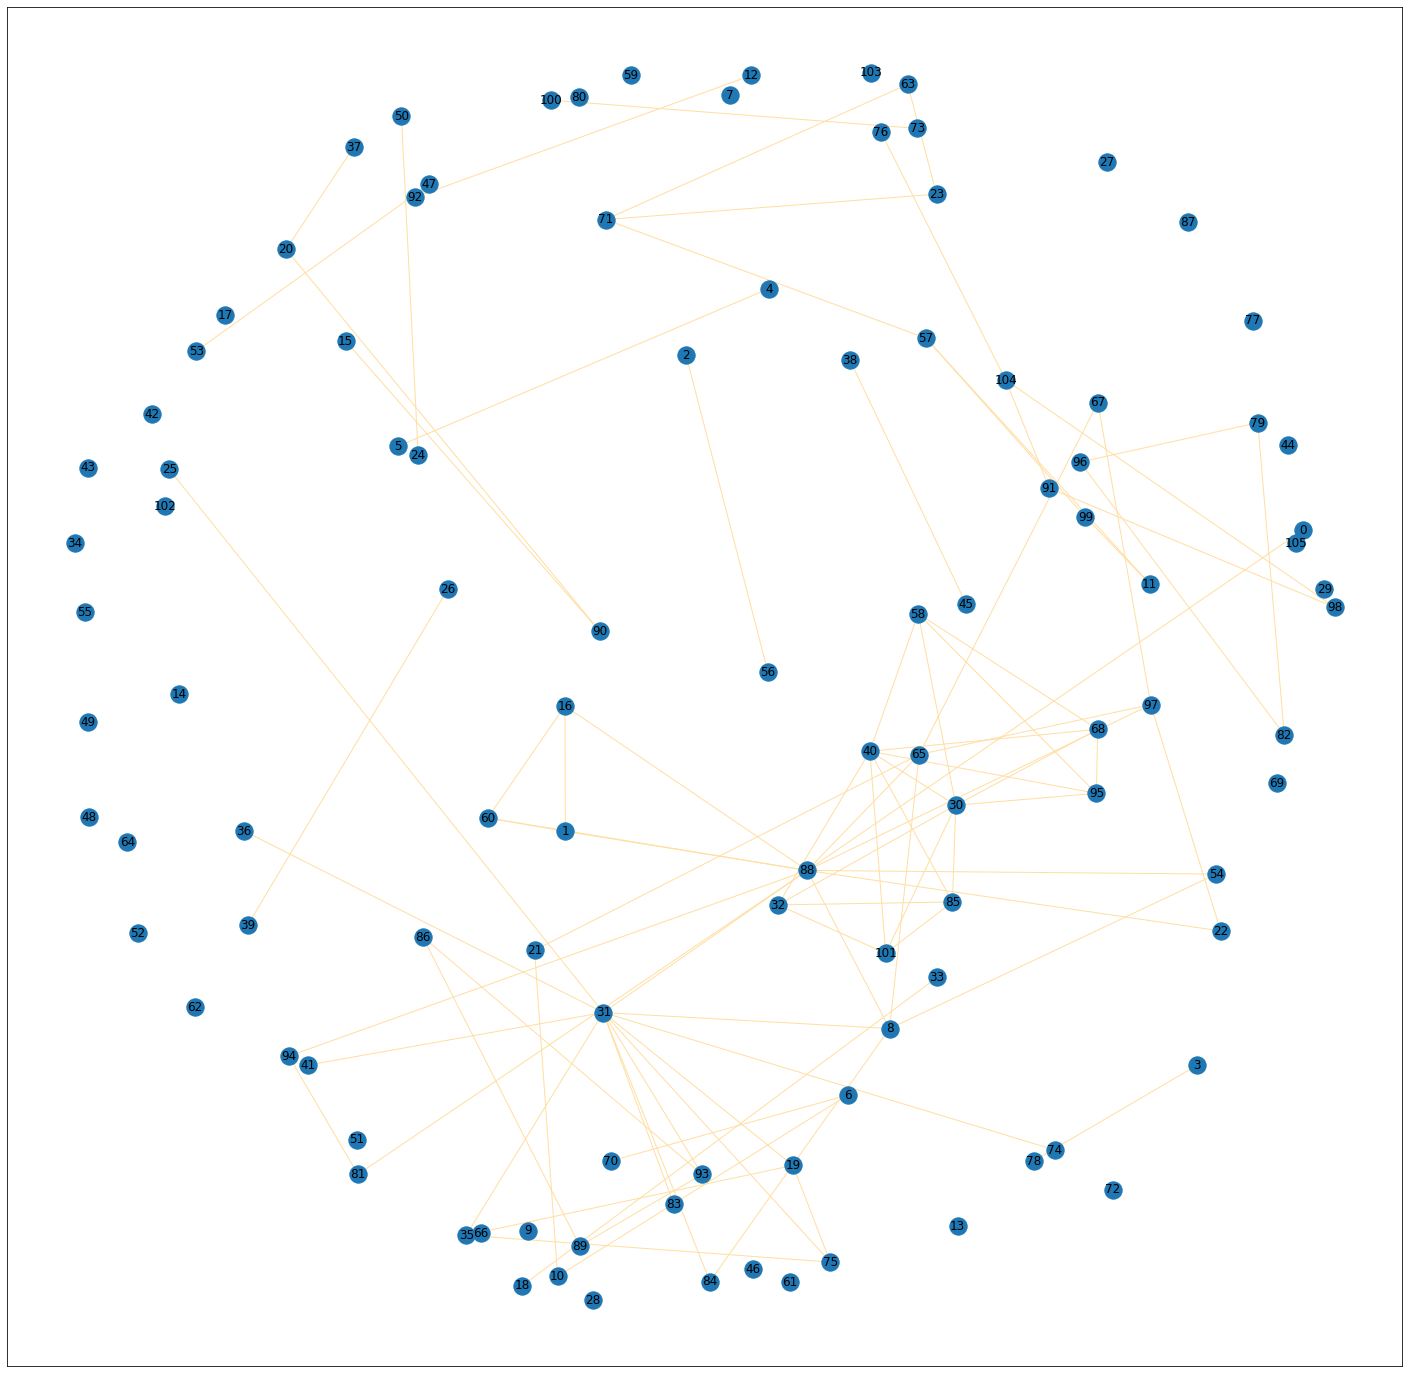

In [158]:
draw_graph(G,size=(25,25))

(array([61., 22., 10.,  7.,  2.,  2.,  0.,  0.,  0.,  2.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

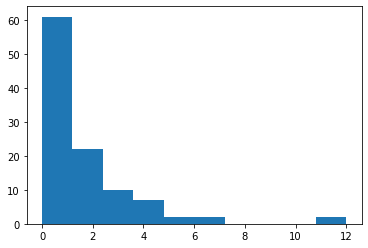

In [159]:
plt.hist([node[1] for node in list(G.degree())])

### Centrality Measures
Centrality measures helps us to idenfity the most important nodes or vertices in a graph. Different centrality measures like degree centrality, betweenness centrality, eigenvector centrality are used to measure influence of nodes in a network.

- Degree Centrality : Degree centrality of a node is the fraction of the nodes it's connected to. Intuitively, the greater the degree that node can be more powerful. For example we can think that a twitter celebrity with 1 m follower is more influential than a regular user with 100 followers.

- Betweenness Centrality : Betweenness centrality is a measure of centrality in a graph based on the idea of shortest path. Betwenness centrality of node A is fraction of shortest paths that passes through node A. Nodes with high betweeness centrality works as the 'power broker' or the 'bridges' between different isolated parts of a network.

In [160]:
degree_centrality = nx.degree_centrality(G)
top_10_nodes_by_degree_centrality = sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]
top_10_nodes_by_degree_centrality

[(31, 0.1142857142857143),
 (88, 0.1142857142857143),
 (30, 0.06666666666666668),
 (40, 0.06666666666666668),
 (8, 0.04761904761904762),
 (65, 0.04761904761904762),
 (32, 0.0380952380952381),
 (58, 0.0380952380952381),
 (68, 0.0380952380952381),
 (85, 0.0380952380952381)]

In [161]:
betweenness_centrality = nx.betweenness_centrality(G)
top_10_nodes_by_betweenness_centrality = sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]
top_10_nodes_by_betweenness_centrality

[(31, 0.04603174603174603),
 (88, 0.04172771672771674),
 (65, 0.02106227106227106),
 (21, 0.014285714285714285),
 (8, 0.009981684981684981),
 (10, 0.00989010989010989),
 (93, 0.00989010989010989),
 (6, 0.005128205128205128),
 (97, 0.0020757020757020753),
 (57, 0.001098901098901099)]

In [162]:
closeness_centrality = nx.closeness_centrality(G)
top_10_nodes_by_closeness_centrality = sorted(closeness_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]
top_10_nodes_by_closeness_centrality

[(88, 0.14832451499118168),
 (31, 0.14051796157059315),
 (8, 0.13130366900858703),
 (65, 0.11608005521048999),
 (97, 0.10823680823680824),
 (84, 0.10401978973407545),
 (1, 0.10011904761904762),
 (16, 0.10011904761904762),
 (22, 0.10011904761904762),
 (54, 0.10011904761904762)]